## 딥러닝(Deep Learning)
  * 인공신경망(artificial neural network)
  * 인간 두뇌의 작동 원리를 응용하여 고안한 방식
  * 다중계층으로 이루어진 신경망의 구조
  * 입력되는 훈련 데이터로 딥러닝 훈련
  * 신경망(Neural Network): 인간의 뇌신경 세포를 모방하여 만든 수학적 모델

### 신경망(Neural Network)
  * 딥러닝의 신경망은 층(또는 레이어)으로 구성된 계층구조로 이루어져 있음
  * 데이터가 처음으로 입력되는 입력층(Input Layer)과 마지막 결과가 출력되는 출력층(Output Layer)가 있음
  * 이 사이에는 선택적으로 여러 개의 은닉층을 가질 수 있음

#### 가중치 계산을 위한 함수
* 초기화된 가중치는 입력이 반복됨에 따라 더욱 적합한 값을 가질 수 있도록 첫 예측값 Y와 진짜 타깃 X의 오차를 최소화해야 함
  1. 활성화 함수(Activation Function)
    * 최적화 함수로 구한 값을 기반으로 다음 계층의 입력값을 활성화 함수(Activation Function)로 계산하여 다음 입력으로 사용
  2. 손실 함수(Loss Function)
    * 손실 함수를 통해 예측값 Y와 진짜 타깃 X의 오차를 구하고
  3. 최적화 함수(Optimization Function)
    * 이러한 오차를 줄이기 위하여 최적화 함수를 사용하여 가중치를 최적화하도록 적절히 조절한 후

* 이러한 과정을 반복하면 딥러닝의 신경망 모델을 최적화 할 수 있음

#### 활성화 함수(Activation Function)
  * 인공 신경망 내부에서 입력받은 데이터를 근거로 다음 계층으로 출력할 값을 결정하는 기능 수행
  * 신경망 구성 시 설정, 각 레이어를 정의할 때 세부적인 함수를 선택하게 됨
  * 일반적으로 은닉층에서는 "sigmoid" 함수를 사용하기도 하는데 이 함수는 학습하는 과정에서 0에 가까워지는 Vanishing Gradient 문제가 있음
  * 따라서 이러한 문제를 개선한 "relu" 함수를 주로 사용함
    * "relu" 함수는 양수 값이 나오면 그대로 반환하지만 음수 값이 나오면 0을 반환하는 특성을 가짐


  | 설정 시기 | 딥러닝 목표 | 활성화 함수 |
  |----------|------------|------------|
  | 컴파일 시 |      -     | relu/sigmoid |
  |          |   이진분류  |    sigmoid   |
  |          |   다중분류  |    softmax   |

#### 손실 함수(Loss/Cost Function)
  * 예측값(측정값)과 실제값의 차이를 구하기 위한 함수
  * 신경망 컴파일 시 설정, 신경망의 목표와 일치하는 함수를 선택해야 함

  | 설정 시기 | 딥러닝 목표 | 함수 |
  |----------|-----------|------|
  | 컴파일 시 |  회귀분석  | cross-entropy |
  |          |  이진분류  | binary_crossentropy |
  |          |  다중분류  | categorical_crossentropy |
  

#### 최적화 함수(Optimizer Function)
  * 손실 함수의 결과값을 최소화하는 함수
  * 경사하강법(Gradient Descent) 사용
  * 컴파일 과정에서 함수 정의
  * 확률적 경사하강법(SGD; Stochastic Gradient Descent) - 경사하강법 개선
  * RMSProp 방식 - 확률적 경사하강법 개선

### Tensorflow & Keras
  * 딥러닝 모델의 학습 수행 과정
    * 모델 구조 생성: 단수 또는 복수 개의 계층(layer)으로 구성된 신경망 모델의 구조 생성
      * Keras: `models`라는 신경망 모델 사용하여 신경망의 계층(Layer) 생성
      * `models.Sequential()` 함수로 설정하면 설정하는 모든 레이어를 선형적인 순서로 나열하겠다는 것
      * `add()` 함수 사용 시 계층 생성
      * `Dense()` 함수를 이용하면 해당 계층을 설정할 수 있음 - Keras의 `layers`에서 지원
        * 예: `model.add(layers.Dense(1, input_dim=2, activation='sigmoid'))`
        * 첫 번째 인자(`1`): 출력 뉴런의 수. 여기에 1로 설정하면 `(샘플 개수, 1)`의 배열 형식으로 출력
        * 두 번째 인자(`input_dim=2`): 입력 데이터 개수가 2개라는 의미
          * `input_dim=2` 대신 `input_shape=(2,)`를 사용하여도 무방함
        * 마지막 인자(`activation='sigmoid'`) 활성화(activation) 함수로 'sigmoid'를 선택했다는 의미

In [1]:
from keras import models
from keras import layers

In [2]:
model = models.Sequential()
model.add(layers.Dense(1, input_dim=2, activation='sigmoid'))

* 위의 예제에서는 계층이 단일 계층으로 구성되어 입력 계층이자 출력 계층이 됨
* 위의 예제는 이진분류이므로 활성화 함수를 sigmoid로 하였음
* 대부분의 경우 출력 결과는 0 또는 1에 가까운 실수형 값으로 나타남
* 0에 가까운 실수는 0번 군집, 1에 가까운 실수는 1번 군집을 의미

#### 2개의 계층을 사용하는 경우
  * 첫 번째 계층: 입력 계층
  * 두 번째 계층: 출력 계층
    * 출력을 반드시 1로 설정하고 활성화 함수를 이곳으로 이동

In [3]:
from keras import models
from keras import layers

In [4]:
model = models.Sequential(
    [
        layers.Dense(4, input_shape=(2,)),
        layers.Dense(1, activation='sigmoid')
    ]
)

In [5]:
model.compile(optimizer='SGD', loss='binary_crssentropy')

In [6]:
# history = model.fit(X_train, y_train)

### 신경망의 데이터 구조
|    | 처리 데이터 구조 | 텐서 형식 |
|----|----------------|----------|
| 1  | 2D 텐서 벡터 데이터 처리 | (sample, features) |
| 2  | 3D 텐서 시퀀스 데이터 처리 | (sample, timesteps, features) |
| 3  | 4D 텐서 이미지 데이터 처리 | 2D 합성곱층(Conv2D) |

In [7]:
from keras import models
from keras import layers

In [8]:
model = models.Sequential()
model.add(layers.Dense(8, input_shape=(3, 4), activation='relu'))
model.add(layers.Dense(1, activation=('softmax')))

In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

### 이진 분류(Binary Classification) 모델
  * 딥러닝의 결과가 둘 중 하나를 예측하는 모델

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

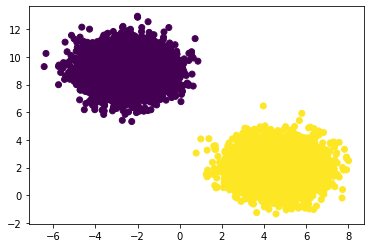

In [11]:
data, labels = make_blobs(n_samples=10000, n_features=2, centers=2, random_state=42)

plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.show()

#### `make_blobs()`
  * 등방성 가우시안 정규분포를 이용하여 가상 데이터 생성
    * 등방성: 모든 방향으로 같은 성질을 가짐
    * 클러스터링을 위한 가상 데이터 생성에 사용
  * 인수
    | 파라미터 | 내용 |
    |---------|-----|
    | n_samples | 만들고자 하는 샘플의 총 개수 |
    | n_features | 각 샘플들에 대한 속성(feature)의 개수 |
    | centers | 중심(군집)의 개수 |
    | random_state | 무작위의 수를 생성하기 위한 생성기의 종류 |
  * 반환값
    * x: [n_samples, n_features] 크기의 배열, 독립 변수
    * y: [n_samples] 크기의 배열, 종속 변수

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

c:\Users\SWLEEXZ\anaconda3\envs\ai\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:906: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
c:\Users\SWLEEXZ\anaconda3\envs\ai\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:908: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


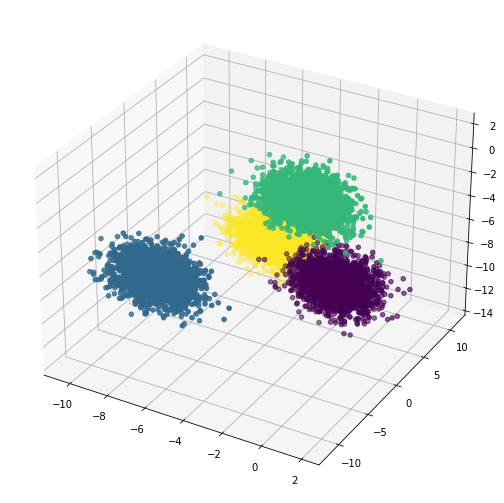

In [13]:
data, labels = make_blobs(n_samples=10000, n_features=4, centers=4, random_state=1)

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], data[:, 3], c=labels)
plt.show()

In [14]:
data, labels = make_blobs(n_samples=10000, n_features=2, centers=2, random_state=42)

In [15]:
print(data[:5])
print(labels[:5])

[[ 4.21810197  1.83852559]
 [ 5.55650652  2.25768167]
 [-2.1884119   9.20833807]
 [-2.3182811   8.97795552]
 [ 5.32670633  1.57484267]]
[1 1 0 0 1]


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [18]:
from keras import models
from keras import layers

In [19]:
model = models.Sequential()
model.add(layers.Dense(1, input_dim=2, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


* 파라미터 수 계산: (입력 개수 + 가중치 개수) * 출력 개수
  * 예: `models.add(layers.Dense(3, input_dim=4, activation='sigmoid'))`
  * (4(입력) + 가중치(1)) * 출력(3) = 15

In [21]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=40, batch_size=100)

Epoch 1/40
80/80 [==============================] - 0s 785us/step - loss: 1.2201 - accuracy: 0.5811
Epoch 2/40
80/80 [==============================] - 0s 810us/step - loss: 0.1002 - accuracy: 0.9998
Epoch 3/40
80/80 [==============================] - 0s 823us/step - loss: 0.0503 - accuracy: 0.9999
Epoch 4/40
80/80 [==============================] - 0s 873us/step - loss: 0.0345 - accuracy: 0.9999
Epoch 5/40
80/80 [==============================] - 0s 873us/step - loss: 0.0266 - accuracy: 0.9999
Epoch 6/40
80/80 [==============================] - 0s 899us/step - loss: 0.0218 - accuracy: 0.9999
Epoch 7/40
80/80 [==============================] - 0s 835us/step - loss: 0.0186 - accuracy: 0.9999
Epoch 8/40
80/80 [==============================] - 0s 899us/step - loss: 0.0162 - accuracy: 0.9999
Epoch 9/40
80/80 [==============================] - 0s 873us/step - loss: 0.0144 - accuracy: 0.9999
Epoch 10/40
80/80 [==============================] - 0s 899us/step - loss: 0.0130 - accuracy: 0.9999

In [22]:
result = model.evaluate(X_test, y_test)
result

63/63 [==============================] - 0s 742us/step - loss: 0.0043 - accuracy: 1.0000


[0.00428155018016696, 1.0]

In [23]:
weights, bias = model.get_weights()
print(weights)
print(bias)

[[ 1.5005586 ]
 [-0.44597012]]
[0.33859992]


In [24]:
a = -(weights[0] / weights[1]) / (weights[0] / bias)
b = -weights[0] / weights[1]

In [25]:
import numpy as np

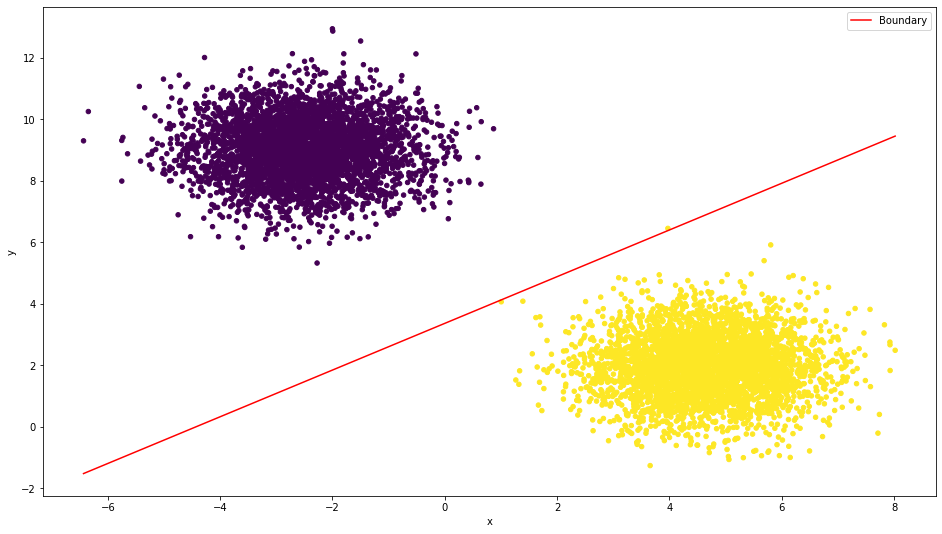

In [26]:
x = np.linspace(np.amin(X_train[:, 0]), np.amax(X_train[:, 0]))
y = [a * i + b for i in x]

plt.figure(figsize=(16,9))
plt.plot(x, y, color='red', label='Boundary')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)
plt.legend()

In [27]:
test = np.array([[2, -2], [2, 2.5], [2, 4], [2, 12]])
pred = model.predict(test)
print(pred)
# 좌상단이 0번 군집, 우하단이 1번 군집으로 보임

1/1 [==============================] - 0s 59ms/step
[[0.98567975]
 [0.90245384]
 [0.8257551 ]
 [0.1179566 ]]
